In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor 

In [2]:
df1 = pd.read_csv('business.csv')
df1.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [3]:
df1['class'] = 'business'

In [4]:
df2 = pd.read_csv('economy.csv')
df2.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [5]:
df2['class'] = 'economy'

In [6]:
df3 = pd.concat([df1, df2])

In [7]:
df3

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business
...,...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",economy
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",economy
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economy
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",economy


In [8]:
df3.stop.replace('non-stop',0,inplace = True)

In [9]:
df3["Flight code"] = df3["ch_code"].map(str) + " " + df3["num_code"].astype(str)

In [10]:
df3.drop(['ch_code','num_code'],axis = 1 , inplace = True)

In [11]:
df3.isna().sum()

date           0
airline        0
dep_time       0
from           0
time_taken     0
stop           0
arr_time       0
to             0
price          0
class          0
Flight code    0
dtype: int64

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         300261 non-null  object
 1   airline      300261 non-null  object
 2   dep_time     300261 non-null  object
 3   from         300261 non-null  object
 4   time_taken   300261 non-null  object
 5   stop         300261 non-null  object
 6   arr_time     300261 non-null  object
 7   to           300261 non-null  object
 8   price        300261 non-null  object
 9   class        300261 non-null  object
 10  Flight code  300261 non-null  object
dtypes: object(11)
memory usage: 27.5+ MB


In [13]:
df3.describe().T

,count,unique,top,freq
date,300261,49,07-03-2022,6633
airline,300261,8,Vistara,127859
dep_time,300261,251,07:00,8760
from,300261,6,Delhi,61345
time_taken,300261,483,02h 10m,4242
stop,300261,40,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,243603
arr_time,300261,266,19:55,9194
to,300261,6,Mumbai,59109
price,300261,12165,"54,608",1445
class,300261,2,economy,206774


In [14]:
def get_part_of_day(hour):
    return (
        "morning" if 5 <= hour <= 12
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 17 <= hour <= 21
        else
        "night"
    )

In [15]:
df3['dep_time'] = df3.dep_time.apply(lambda x: get_part_of_day(dateutil.parser.parse(x).hour))  

In [16]:
df3['arr_time'] = df3.arr_time.apply(lambda x: get_part_of_day(dateutil.parser.parse(x).hour))

In [17]:
def time_change(self):
    x = self.split()
    x1=float(x[0].replace('h',''))*60
    x2=x[1].replace('m','')
    if x2 == '':
        return (x1/60)
    else:
        return ((x1+float(x2))/60)

In [18]:
df3['time_taken'] = df3.time_taken.apply(time_change)

In [19]:
df3['stop'] = df3['stop'].replace('non-stop ','0')

In [20]:
df3['stop'] = df3['stop'].str.extract('(\d+)')

In [21]:
df3.drop(['date','Flight code'],axis = 1 , inplace = True)

In [22]:
df3.head()

,airline,dep_time,from,time_taken,stop,arr_time,to,price,class
0,Air India,evening,Delhi,2.000000,0,evening,Mumbai,"25,612",business
1,Air India,evening,Delhi,2.250000,0,evening,Mumbai,"25,612",business
2,Air India,evening,Delhi,24.750000,1,evening,Mumbai,"42,220",business
3,Air India,evening,Delhi,26.500000,1,night,Mumbai,"44,450",business
4,Air India,afternoon,Delhi,6.666667,1,night,Mumbai,"46,690",business


In [23]:
df3['price'] = df3['price'].str.replace(",", "")

In [24]:
df3

,airline,dep_time,from,time_taken,stop,arr_time,to,price,class
0,Air India,evening,Delhi,2.000000,0,evening,Mumbai,25612,business
1,Air India,evening,Delhi,2.250000,0,evening,Mumbai,25612,business
2,Air India,evening,Delhi,24.750000,1,evening,Mumbai,42220,business
3,Air India,evening,Delhi,26.500000,1,night,Mumbai,44450,business
4,Air India,afternoon,Delhi,6.666667,1,night,Mumbai,46690,business
...,...,...,...,...,...,...,...,...,...
206769,Vistara,morning,Chennai,13.833333,1,evening,Hyderabad,7697,economy
206770,Vistara,morning,Chennai,13.833333,1,evening,Hyderabad,7709,economy
206771,Vistara,morning,Chennai,20.583333,1,morning,Hyderabad,8640,economy
206772,Vistara,morning,Chennai,23.333333,1,morning,Hyderabad,8640,economy


In [25]:
df3['price'] = df3.price.apply(lambda x:int(x))

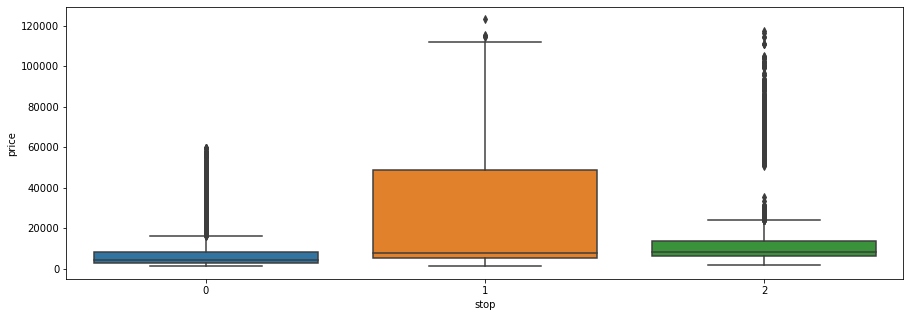

In [26]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'stop', y = 'price', data = df3)
plt.show()

In [27]:
df3 = pd.get_dummies(df3,drop_first = 1)

In [28]:
df3

,time_taken,price,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,dep_time_evening,...,stop_2,arr_time_evening,arr_time_morning,arr_time_night,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,class_economy
0,2.000000,25612,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,2.250000,25612,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,24.750000,42220,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,26.500000,44450,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,6.666667,46690,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,13.833333,7697,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
206770,13.833333,7709,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
206771,20.583333,8640,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
206772,23.333333,8640,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1


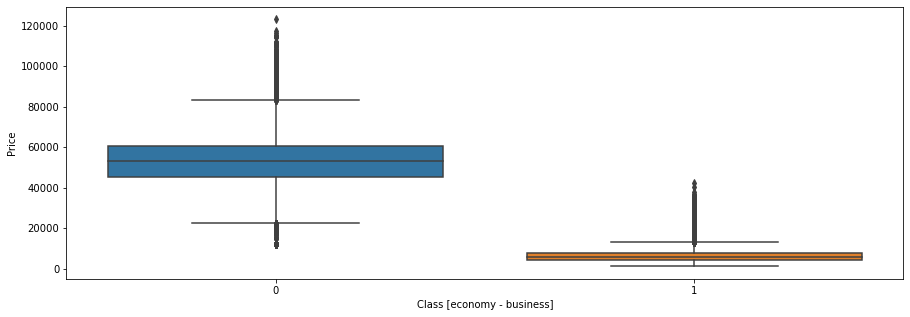

In [41]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'class_economy', y = 'price', data = df3)
plt.xlabel('Class [economy - business]')
plt.ylabel('Price')
plt.show()

In [30]:
y = df3['price']
x = df3.drop('price',axis = 1)

In [31]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 42)

In [32]:
ml = LinearRegression()
l_model = ml.fit(x_train,y_train)

In [33]:
ypred = l_model.predict(x_test)

In [34]:
ypred

array([ 5732.41423614,  5386.63413508, 51820.96921991, ...,
        8571.29003927,  9521.53585049,  8413.85544749])

In [35]:
MSE = mean_squared_error(y_test,ypred)
RMSE = np.sqrt(MSE)
MAE= mean_absolute_error(y_test,ypred)
RSQ = r2_score(y_test,ypred)
print('MSE =',MSE)
print('\nRMSE =',RMSE)
print('\nMAE =',MAE)
print('\nRSQ =',RSQ)

MSE = 49271976.43975329

RMSE = 7019.400005680919

MAE = 4863.206491476196

RSQ = 0.9042685840608937


In [36]:
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)
lm = ml.fit(x_train,y_train)
poly_model = lm.fit(x_poly,y)
ypoly_predict = poly_model.predict(x_poly)

In [37]:
ypoly_predict

array([22096.32043457, 22670.52941895, 47050.78625488, ...,
        4651.54016113,  4456.60266113,  6486.2677002 ])